# Airplane severity prediction

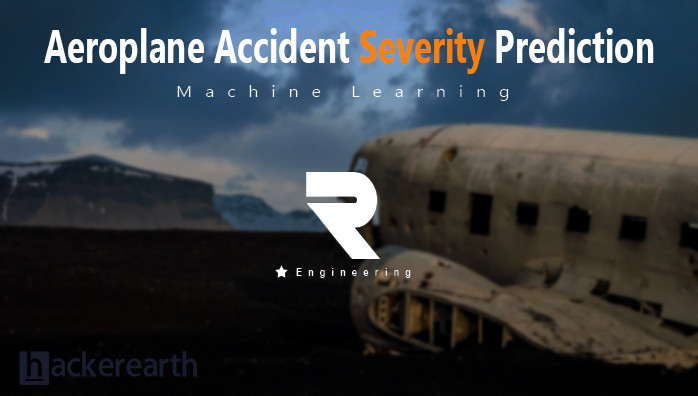

In [1]:
#import necessary libarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sa
%matplotlib inline

In [2]:
# read training data
train_data = pd.read_csv('C:\\Users\\ROHIT\\Z_airplane\\3c055e822d5b11ea\\train.csv')

In [3]:
train_data.head(10)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054
5,Minor_Damage_And_Injuries,43.333333,15,0,73.336372,0.432954,78.63,2,29288.448105,1,0.394505,10947
6,Highly_Fatal_And_Damaging,22.009132,15,10,62.853236,0.314671,88.04,4,32342.109345,0,0.058872,4717
7,Minor_Damage_And_Injuries,24.703196,18,4,60.802188,0.548353,83.48,4,22547.195242,2,0.040419,8008
8,Highly_Fatal_And_Damaging,54.840183,5,40,69.234275,0.335587,78.24,2,45751.983413,0,0.619186,8179
9,Significant_Damage_And_Serious_Injuries,52.237443,6,4,57.429353,0.465410,79.56,1,37933.399001,1,1.389295,6324


In [4]:
#read test data
test_data = pd.read_csv('C:\\Users\\ROHIT\\Z_airplane\\3c055e822d5b11ea\\test.csv')

In [5]:
test_data.head(10)

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21
5,44.794521,8,14,52.597995,0.366961,77.08,2,15496.086157,1,0.221040,40
6,62.374429,13,13,66.499544,0.375616,88.48,7,23226.236895,3,0.002196,45
7,14.520548,17,5,66.180492,0.413841,80.09,4,39076.313532,1,0.071707,50
8,0.000000,20,0,67.730173,0.203960,78.37,6,38472.698964,2,0.009371,52
9,45.981735,11,4,66.545123,0.252283,82.69,6,25419.801519,2,0.006051,85


In [6]:
# convert strings into integer values of target varable
severity = {'Minor_Damage_And_Injuries':1, 'Significant_Damage_And_Fatalities':2, 'Significant_Damage_And_Serious_Injuries':3,
            'Highly_Fatal_And_Damaging':4}
train_data.Severity = [severity[item] for item in train_data.Severity] 
train_data.head(10)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054
5,1,43.333333,15,0,73.336372,0.432954,78.63,2,29288.448105,1,0.394505,10947
6,4,22.009132,15,10,62.853236,0.314671,88.04,4,32342.109345,0,0.058872,4717
7,1,24.703196,18,4,60.802188,0.548353,83.48,4,22547.195242,2,0.040419,8008
8,4,54.840183,5,40,69.234275,0.335587,78.24,2,45751.983413,0,0.619186,8179
9,3,52.237443,6,4,57.429353,0.465410,79.56,1,37933.399001,1,1.389295,6324


In [7]:
# check training data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null int64
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


In [8]:
# check test data information
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
Safety_Score               2500 non-null float64
Days_Since_Inspection      2500 non-null int64
Total_Safety_Complaints    2500 non-null int64
Control_Metric             2500 non-null float64
Turbulence_In_gforces      2500 non-null float64
Cabin_Temperature          2500 non-null float64
Accident_Type_Code         2500 non-null int64
Max_Elevation              2500 non-null float64
Violations                 2500 non-null int64
Adverse_Weather_Metric     2500 non-null float64
Accident_ID                2500 non-null int64
dtypes: float64(6), int64(5)
memory usage: 215.0 KB


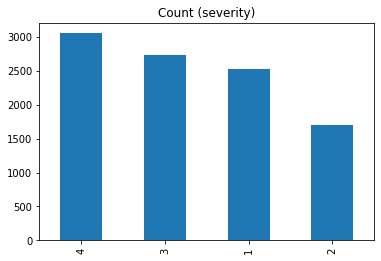

In [9]:
# plot the graph for target variable
target_count = train_data.Severity.value_counts()
target_count.plot(kind='bar', title='Count (severity)')
plt.show()

In [32]:
# check the items present in the data
train_data1 = train_data.drop('Severity', axis=1)
target = train_data['Severity']

train_data1.shape, target.shape

((10000, 11), (10000,))

# Modeling

In [39]:
# import the model libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# cross valiadtion (k-fold)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# Random Forest

In [40]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data1, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.891 0.929 0.906 0.89  0.898 0.877 0.921 0.921 0.914 0.9  ]


In [41]:
# Random forest Score
round(np.mean(score)*100, 2)

90.47

# Bagging

In [42]:
model = BaggingClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(model, train_data1, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.933 0.955 0.936 0.958 0.956 0.943 0.945 0.942 0.954 0.939]


In [43]:
# Bagging Score
round(np.mean(score)*100, 2)

94.61

# Boosing

In [44]:
model = AdaBoostClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(model, train_data1, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.591 0.571 0.46  0.453 0.496 0.432 0.582 0.462 0.488 0.493]


In [45]:
#Boosting Score
round(np.mean(score)*100, 2)

50.28

# Testing
 Test the training data using test data file

In [46]:
clf =  BaggingClassifier(n_estimators=13)
clf.fit(train_data1, target)

prediction = clf.predict(test_data)

In [59]:
# Save the predicted results into .csv file
submission = pd.DataFrame({"Accident_ID": test_data["Accident_ID"], "Severity": prediction})
submission.to_csv('airplane_submission.csv', index=False)

In [60]:
# read .csv file
submission = pd.read_csv('airplane_submission.csv')
submission.head()

,Accident_ID,Severity
0,1,4
1,10,2
2,14,3
3,17,4
4,21,2
